In [1]:
import struct
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
filename={}
filename['train_images']='/home/pavan/Desktop/_telugu/train-images-idx3-ubyte'
filename['train_labels']='/home/pavan/Desktop/_telugu/train-labels-idx1-ubyte'
filename['test_images']='/home/pavan/Desktop/_telugu/t10k-images-idx3-ubyte'
filename['test_labels']='/home/pavan/Desktop/_telugu/t10k-labels-idx1-ubyte'

In [3]:
with open(filename['train_images'], 'rb') as f:
    zero, data_type, dims = struct.unpack('>HBB', f.read(4))
    shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
    train_images=np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

with open(filename['train_labels'], 'rb') as f:
    zero, data_type, dims = struct.unpack('>HBB', f.read(4))
    shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
    train_labels=np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

with open(filename['test_images'], 'rb') as f:
    zero, data_type, dims = struct.unpack('>HBB', f.read(4))
    shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
    test_images=np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

with open(filename['test_labels'], 'rb') as f:
    zero, data_type, dims = struct.unpack('>HBB', f.read(4))
    shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
    test_labels=np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

print(f'The tensorflow version is : ',tf.__version__)

The tensorflow version is :  1.14.0


In [4]:
print(train_images.shape)
print(train_labels.shape)

(5281, 50, 50)
(5281,)


In [5]:
class_names=[]
for i in range(16):
    class_names.append(str(i))

In [6]:
print(test_images.shape)
print(test_labels.shape)

(1591, 50, 50)
(1591,)


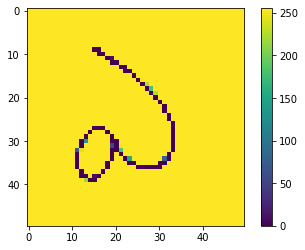

In [9]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

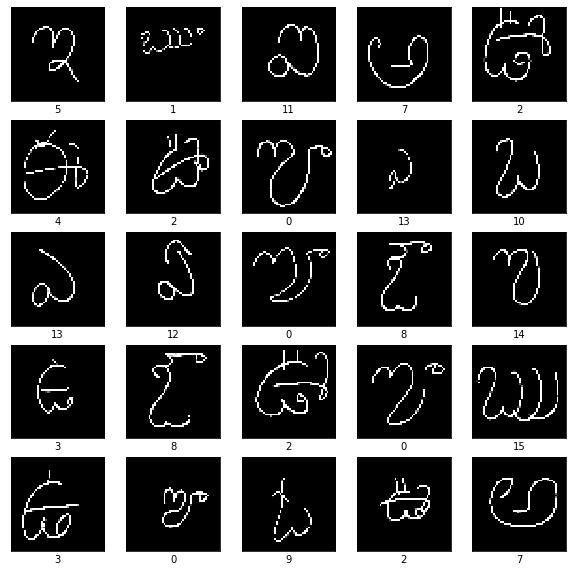

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(50, 50)),
#     keras.layers.Dense(1024, activation=tf.nn.relu),
#     keras.layers.Dense(210, activation=tf.nn.relu),
#     keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.softmax)
])

W0830 14:25:46.880934 140008716822336 deprecation.py:506] From /home/pavan/anaconda3/envs/tflow/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
5281/5281 [==============================] - 0s 65us/sample - loss: 0.3356 - acc: 0.9099
Epoch 2/10
5281/5281 [==============================] - 0s 58us/sample - loss: 0.3273 - acc: 0.9178
Epoch 3/10
5281/5281 [==============================] - 0s 67us/sample - loss: 0.3374 - acc: 0.9165
Epoch 4/10
5281/5281 [==============================] - 1s 141us/sample - loss: 0.3277 - acc: 0.9176
Epoch 5/10
5281/5281 [==============================] - 0s 60us/sample - loss: 0.3365 - acc: 0.9095
Epoch 6/10
5281/5281 [==============================] - 0s 59us/sample - loss: 0.3121 - acc: 0.9231
Epoch 7/10
5281/5281 [==============================] - 0s 63us/sample - loss: 0.3338 - acc: 0.9118
Epoch 8/10
5281/5281 [==============================] - 0s 63us/sample - loss: 0.3518 - acc: 0.9042
Epoch 9/10
5281/5281 [==============================] - 0s 76us/sample - loss: 0.3234 - acc: 0.9108
Epoch 10/10
5281/5281 [==============================] - 0s 75us/sample - loss: 0.3154 - acc: 0.915

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

1591/1591 [==============================] - 0s 60us/sample - loss: 0.7139 - acc: 0.7674
Test accuracy: 0.76744187


In [23]:
predictions=model.predict(test_images)

In [24]:
predictions[0]

array([9.9663430e-01, 1.9031585e-03, 1.2277242e-05, 1.4210353e-08,
       1.5337919e-07, 2.6593580e-05, 7.0054392e-07, 7.7476841e-05,
       2.4367836e-08, 5.3829945e-07, 1.0985314e-07, 9.2882168e-05,
       1.2190746e-06, 1.3255709e-07, 1.2436514e-03, 6.7367664e-06],
      dtype=float32)

In [25]:
for i in range(14):
    print(np.argmax(predictions[i]),end='\t')

0	5	9	7	13	12	8	12	15	10	3	7	11	8	

In [26]:
for i in range(14):
    print(test_labels[i],end='\t')

0	5	9	7	13	12	8	12	15	10	2	6	11	8	